In [90]:
import pandas as pd #Daten
from matplotlib import pyplot as plt # plots
import matplotlib.dates as mdates
#import matplotlib as mpl
from matplotlib.ticker import FuncFormatter   # Numberformat plot ticks
import numpy as np

# performance
from datetime import datetime, timedelta
from datetime import date # todays date
#import seaborn as sns

import os
now = datetime.now()

In [91]:
# Linien Stärke
lws = 3
lwb = 7
# Bezugsschriftgröße
size = 25

# output größe der bilder
h = 16*1.3
v = 9
dpi = 200

today = date.today().strftime("%d.%m.%Y")

In [92]:
df = pd.read_csv("D:\\Github\\Auswertung_Covid_19\\input\\Impfungen_Timeseries.csv", sep=";")

In [93]:
df.tail(-2)

,Datum,Erstimpfung,Zweitimpfung,Gesamtzahl verabreichter Impfstoffdosen
2,29.12.2020,49291,0,49291
3,30.12.2020,63349,0,63349
4,31.12.2020,49605,0,49605
5,01.01.2021,25335,0,25335
6,02.01.2021,47665,0,47665
...,...,...,...,...
203,18.07.2021,69786,127677,197463
204,19.07.2021,104070,268397,372467
205,20.07.2021,138641,450949,589590
206,21.07.2021,164044,561410,725454


In [94]:
# df.dtypes

In [95]:
df['Datum'] =  pd.to_datetime(df['Datum'], format='%d.%m.%Y', utc=True)
# df

In [96]:
# df.dtypes

In [97]:
### Berechnungen

df["Erstimpfung_MA"] = df["Erstimpfung"].rolling(window=7, center=True, min_periods=7).mean()
df["Zweitimpfung_MA"] = df["Zweitimpfung"].rolling(window=7, center=True, min_periods=7).mean()
df["Erstimpfung_cumsum"] = df["Erstimpfung"].cumsum()
df["Zweitimpfung_cumsum"] = df["Zweitimpfung"].cumsum()
df

,Datum,Erstimpfung,Zweitimpfung,Gesamtzahl verabreichter Impfstoffdosen,Erstimpfung_MA,Zweitimpfung_MA,Erstimpfung_cumsum,Zweitimpfung_cumsum
0,2020-12-27 00:00:00+00:00,24086,0,24086,NaN,NaN,24086,0
1,2020-12-28 00:00:00+00:00,17805,0,17805,NaN,NaN,41891,0
2,2020-12-29 00:00:00+00:00,49291,0,49291,NaN,NaN,91182,0
3,2020-12-30 00:00:00+00:00,63349,0,63349,39590.857143,0.000000,154531,0
4,2020-12-31 00:00:00+00:00,49605,0,49605,39350.714286,0.000000,204136,0
...,...,...,...,...,...,...,...,...
203,2021-07-18 00:00:00+00:00,69786,127677,197463,132318.285714,376329.285714,49871074,36348121
204,2021-07-19 00:00:00+00:00,104070,268397,372467,123386.714286,357641.285714,49975144,36616518
205,2021-07-20 00:00:00+00:00,138641,450949,589590,NaN,NaN,50113785,37067467
206,2021-07-21 00:00:00+00:00,164044,561410,725454,NaN,NaN,50277829,37628877


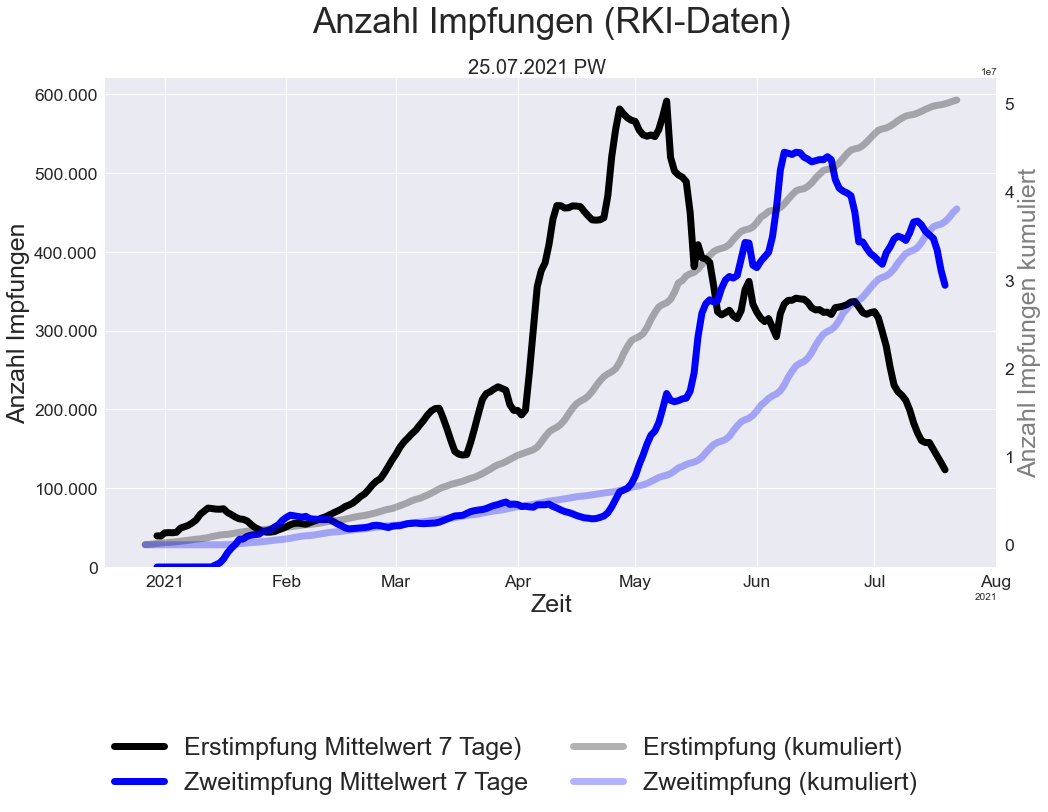

In [133]:
def y_axis_thousands(x, pos):
   # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",",".")
formatter = FuncFormatter(y_axis_thousands)


plt.style.use('seaborn')

fig,ax=plt.subplots(figsize=(16,9))

ax.yaxis.set_major_formatter(formatter)

# plt.plot(df['Datum'],df['Erstimpfung'], color="black", linestyle = '', linewidth = lwb,
#                marker=".", markersize =size*0.5, alpha=0.7,
#                label = "Erstimpfung)") # blau, linie, dick
plt.plot(df['Datum'],df['Erstimpfung_MA'], color="black", linestyle = '-', linewidth = lwb,
               marker="", markersize =size*0.5,
               label = "Erstimpfung Mittelwert 7 Tage)") # blau, linie, dick


# plt.plot(df['Datum'],df['Zweitimpfung'], color="blue", linestyle = '', linewidth = lwb, 
#                marker="*",  markersize =size*0.5,
#                label = "Zweitimpfung") # blau, linie, dick
plt.plot(df['Datum'],df['Zweitimpfung_MA'], color="blue", linestyle = '-', linewidth = lwb,
               marker="", markersize =size*0.5,
               label = "Zweitimpfung Mittelwert 7 Tage") # blau, linie, dick

plt.xticks(fontsize=size*0.7, rotation=0)
plt.yticks(fontsize=size*0.7)

plt.ylabel('Anzahl Impfungen', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Anzahl Impfungen (RKI-Daten)\n', fontsize=size+10)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.91)

# # fill area between lines
# plt.fill_between(df_I_TS['Datum'], df_I_TS['OTG_Impfungen'], df_I_TS['UTG_Impfungen'] , color='red',alpha=0.5)

# Legende 
plt.legend(loc='upper right', 
        bbox_to_anchor=(0.5, -0.3),
        fancybox=True, 
        shadow=True, 
        ncol=1, 
        fontsize=size,
        )


ax2 = ax.twinx()

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(formatter)

ax.set_ylim(ymin=0)
ax2.grid(None)

plt.plot(df['Datum'],df['Erstimpfung_cumsum'], color="black", linestyle = '-', linewidth = lwb,
            marker="", markersize =size*0.5,
            alpha=0.3,
            label = "Erstimpfung (kumuliert)") # blau, linie, dick

plt.plot(df['Datum'],df['Zweitimpfung_cumsum'], color="blue", linestyle = '-', linewidth = lwb,
            marker="", markersize =size*0.5,
            alpha=0.3,
            label = "Zweitimpfung (kumuliert)") # blau, linie, dick

plt.legend(loc='upper left', 
        bbox_to_anchor=(0.5, -0.3),
        fancybox=True, 
        shadow=True, 
        ncol=1, 
        fontsize=size,
        )

ax2.set_ylabel("Anzahl Impfungen kumuliert", color="grey", fontsize=size)
ax2.tick_params(labelsize=size * 0.7)

plt.savefig("D:\\Github\\Auswertung_Covid_19\\output\\Impfungen TS.png", dpi=dpi, bbox_inches='tight')


plt.show()